In [361]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

In [362]:
import os
cwd = os.getcwd()
display(cwd)

'/Users/fni/Desktop/Python'

In [363]:
class Simple_autoML_BinaryClass:
    def __init__(self, data_path, target_column, model_type):
        """Sample AutoML API that deals with binary classification problems.
        Args:
            data_path (str): Location of your sample dataset - place it in the same location as the code.
            target_column (str): Column you are trying to predict.
            model_type (str): Options are linear_regression and random_forest. #Change
            
        """
        self.data_path = data_path
        self.target_column = target_column
        self.model_type = model_type
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.train_ = None
        self.test_ = None 
        self.my_model = None #use this to store the model trained for ensample models
        self.X_train_scaled = None
        self.X_test_scaled = None
        self.params = None


    def preprocess(self):
        df = pd.read_csv(self.data_path)
        columns = df.columns
        if self.target_column not in columns:
            raise ValueError("Target column not present in dataset")
        X = df.drop([self.target_column], axis = 1) 
        y = df[self.target_column]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.X_train_scaled = StandardScaler().fit_transform(X_train)
        self.X_test_scaled = StandardScaler().fit_transform(X_test)
        
    def train(self):
        model_types = ['MultinomialNB', 'LogisticRegression','KNeighborsClassifier','LinearSVC',\
                      'DecisionTreeClassifier','BaggingClassifier','AdaBoostClassifier'\
                      ,'RandomForestClassifier','SGDClassifier'] #Change
        if self.model_type not in model_types:
            raise ValueError(f"Enter a model type that is supported from the following list: {model_types}")

        if self.model_type == "MultinomialNB":
            #Model Creation for MultinomialNB
            model_ = MultinomialNB()
            model_.fit(self.X_train,self.y_train)
            params_=model_.get_params()
            #Model prediction
            train = model_.score(self.X_train_scaled,self.y_train)
            test = model_.score(self.X_test_scaled, self.y_test)

        elif self.model_type == "LogisticRegression": 
            #Model Creation for LogisticRegression
            model_ = LogisticRegression(max_iter=550, tol=0.1, C=0.01,n_jobs=20)
            model_.fit(self.X_train_scaled,self.y_train)
            params_=model_.get_params()
            #Model prediction
            train = model_.score(self.X_train_scaled,self.y_train)
            test = model_.score(self.X_test_scaled, self.y_test)
            
        elif self.model_type == "SGDClassifier": 
            #Model Creation for LogisticRegression
            model_ = SGDClassifier(alpha = 0.001)
            model_.fit(self.X_train_scaled,self.y_train)
            params_=model_.get_params()
            #Model prediction
            train = model_.score(self.X_train_scaled,self.y_train)
            test = model_.score(self.X_test_scaled, self.y_test)
        
        elif self.model_type == "KNeighborsClassifier": 
            #Model Creation for KNeighborsClassifier
            model_ = KNeighborsClassifier(algorithm = 'brute', n_jobs=-1)
            model_.fit(self.X_train,self.y_train)
            params_=model_.get_params()
            #Model prediction
            train = model_.score(self.X_train_scaled,self.y_train)
            test = model_.score(self.X_test_scaled, self.y_test)
            
        elif self.model_type == "LinearSVC": 
            #Model Creation for LinearSVC
            model_=LinearSVC(C=0.0001)
            model_.fit(self.X_train,self.y_train)
            params_=model_.get_params()
            #Model prediction
            train = model_.score(self.X_train,self.y_train)
            test = model_.score(self.X_test, self.y_test)
            
        elif self.model_type == "DecisionTreeClassifier": 
            #Model Creation for DecisionTreeClassifier
            model_=DecisionTreeClassifier()
            model_.fit(self.X_train,self.y_train)
            params_=model_.get_params()
            #Model prediction
            train = model_.score(self.X_train,self.y_train)
            test = model_.score(self.X_test, self.y_test)            
            
        elif self.model_type == "BaggingClassifier": 
            #Model Creation for BaggingClassifier
            model_=BaggingClassifier(DecisionTreeClassifier(),max_samples=0.5,max_features=1.0,n_estimators=10)
            model_.fit(self.X_train,self.y_train)
            params_=model_.get_params()
            #Model prediction
            train = model_.score(self.X_train,self.y_train)
            test = model_.score(self.X_test, self.y_test)
        
        elif self.model_type == "AdaBoostClassifier": 
            #Model Creation for AdaBoostClassifier
            model_=AdaBoostClassifier(DecisionTreeClassifier(min_samples_split=10,max_depth=4),\
                                      n_estimators=10,learning_rate=0.6)
            model_.fit(self.X_train,self.y_train)
            params_=model_.get_params()
            #Model prediction
            train = model_.score(self.X_train,self.y_train)
            test = model_.score(self.X_test, self.y_test)
            
        elif self.model_type == "RandomForestClassifier": 
            #Model Creation for RandomForestClassifier
            model_=RandomForestClassifier(n_estimators=100, max_depth=20)
            model_.fit(self.X_train,self.y_train) 
            params_=model_.get_params()
            #Model prediction
            train = model_.score(self.X_train,self.y_train)
            test = model_.score(self.X_test, self.y_test)
            
        self.train_ = train 
        self.test_ = test
        self.my_model = model_
        self.params = params_

    def explain(self):
        if self.model_type == "LogisticRegression" : #Change
            #return print(pd.DataFrame(zip(self.X_train.columns, np.transpose(self.my_model.coef_)), columns=['features', 'coef']))
            return f"{pd.DataFrame(zip(self.X_train.columns, np.transpose(self.my_model.coef_)), columns=['features', 'coef'])},\n intercept: {self.my_model.intercept_}" #Change
        
        elif self.model_type == "DecisionTreeClassifier" :
            sorted_feature_weight_idxes = np.argsort(self.my_model.feature_importances_)[::-1]
            most_important_features = np.take_along_axis(np.array(self.X_train.columns.tolist()),sorted_feature_weight_idxes, axis=0)
            most_important_weights = np.take_along_axis(np.array(self.my_model.feature_importances_), sorted_feature_weight_idxes, axis=0)
            return plt.barh(most_important_features[::-1], most_important_weights[::-1])
        
        elif self.model_type == "AdaBoostClassifier" :
            sorted_feature_weight_idxes = np.argsort(self.my_model.feature_importances_)[::-1]
            most_important_features = np.take_along_axis(np.array(self.X_train.columns.tolist()),sorted_feature_weight_idxes, axis=0)
            most_important_weights = np.take_along_axis(np.array(self.my_model.feature_importances_), sorted_feature_weight_idxes, axis=0)
            return plt.barh(most_important_features[::-1], most_important_weights[::-1])
        
        elif self.model_type == "RandomForestClassifier" :
            sorted_feature_weight_idxes = np.argsort(self.my_model.feature_importances_)[::-1]
            most_important_features = np.take_along_axis(np.array(self.X_train.columns.tolist()),sorted_feature_weight_idxes, axis=0)
            most_important_weights = np.take_along_axis(np.array(self.my_model.feature_importances_), sorted_feature_weight_idxes, axis=0)
            return plt.barh(most_important_features[::-1], most_important_weights[::-1])
        

            
        else:
            return f" This model can not be explained: {self.model_type}" #Change
    
    
    def logModelInfo(self):
        if self.model_type == "KNeighborsClassifier": 
            modelDetails = {
            "ModelType": self.model_type,
            "train_score": self.train_, 
            "test_score": self.test_ ,
            "knn_shape": self.X_train.shape,
            "params": self.params
            }
            return modelDetails
        else: 
            modelDetails = {
            "ModelType": self.model_type,
            "train_score": self.train_, 
            "test_score": self.test_,
            "params": self.params
            }
            return modelDetails

{'ModelType': 'RandomForestClassifier', 'train_score': 0.9915730337078652, 'test_score': 0.8379888268156425, 'params': {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 20, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}}
<BarContainer object of 12 artists>


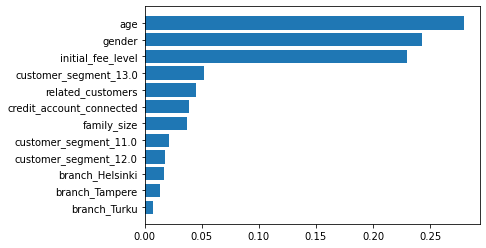

In [364]:
if __name__ == '__main__':
    auto_model = Simple_autoML_BinaryClass("data/knn.csv", "converted", "RandomForestClassifier")
    auto_model.preprocess()
    auto_model.train()
    print(auto_model.logModelInfo())
    print(auto_model.explain())

In [365]:
['MultinomialNB', 'LogisticRegression','KNeighborsClassifier','LinearSVC','DecisionTreeClassifier'
'BaggingClassifier','AdaBoostClassifier','RandomForestClassifier','SGDClassifier']

['MultinomialNB',
 'LogisticRegression',
 'KNeighborsClassifier',
 'LinearSVC',
 'DecisionTreeClassifierBaggingClassifier',
 'AdaBoostClassifier',
 'RandomForestClassifier',
 'SGDClassifier']

In [366]:
#Voting Classifier (Ensemble Learning IV)

In [ ]:
from sklearn.ensemble import VotingClassifier
# 1) naive bias = mnb
# 2) logistic regression =lr
# 3) random forest =rf
# 4) support vector machine = svm
evc=VotingClassifier(estimators=[('mnb',mnb),('lr',lr),('rf',rf),('svm',svm)],voting='hard')
evc.fit(x_train, y_train)
print("score on test: " + str(evc.score(x_test, y_test)))
print("score on train: "+ str(evc.score(x_train, y_train)))

In [102]:
from sklearn.ensemble import RandomForestRegressor

# Fill in rfr using your variables
rfr = RandomForestRegressor(
    n_estimators=100,
    max_depth=random.choice(max_depth),
    min_samples_split=random.choice(min_samples_split),
    max_features=random.choice(max_features))

# Print out the parameters
print(rfr.get_params())

##################################################################

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error

# Finish the dictionary by adding the max_depth parameter
param_dist = {"max_depth": [2,4,6,8],
              "max_features": [2, 4, 6, 8, 10],
              "min_samples_split": [2, 4, 8, 16]}

# Create a random forest regression model
rfr = RandomForestRegressor(n_estimators=10, random_state =1111)

# Create a scorer to use (use the mean squared error)
scorer = make_scorer(mean_squared_error)

##################################################################

# Import the method for random search
from sklearn.model_selection import RandomizedSearchCV

# Build a random search using param_dist, rfr, and scorer
random_search =\
    RandomizedSearchCV(
        estimator=rfr,
        param_distributions=param_dist,
        n_iter=10,
        cv=5,
        scoring=scorer)


##################################################################



NameError: name 'random' is not defined

In [95]:
?LogisticRegression

In [120]:
df=pd.read_csv('data/knn.csv')
X = df.drop(['converted'], axis = 1) 
y = df['converted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

In [381]:
from sklearn.metrics import precision_score, make_scorer
from sklearn.model_selection import RandomizedSearchCV

#rfc = RandomForestClassifier(n_estimators=100, random_state =1111)
x = []
for i in range(1,10,1):
    x.append(i)

y = []
for i in range(50,200,50):

    y.append(i)
    

param_dist = {"max_depth": x,
              "max_features": x,
              "min_samples_split": x,
              'min_weight_fraction_leaf':[0,0.2,0.5],
              'ccp_alpha':[0,0.2,0.5],
             'n_estimators':y}



# Finalize the random search
rs = RandomizedSearchCV(
  estimator=RandomForestClassifier(), param_distributions=param_dist,
  cv=5, n_iter=10, random_state=1111, refit=True)
rs.fit(X_train, y_train)
optimised_random_forest = rs.best_estimator_
# print the mean test scores:
print('The accuracy for each run was: {}.'.format(rs.cv_results_['mean_test_score']))
# print the best model score:
print('The best accuracy for a single model was: {}'.format(rs.best_score_))
print(rs.best_params_)
#print(rs.get_params())
print(optimised_random_forest.score(X_train, y_train))
print(optimised_random_forest.score(X_test, y_test))
print(optimised_random_forest.get_params())

--Return--
> <ipython-input-381-ab92e3948bef>(28)<module>()->None
-> breakpoint()
(Pdb) exit


BdbQuit: 

In [347]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(estimator=RandomForestClassifier(), 
                    param_grid=param_dist,
                    cv=3,
                    refit=True,
                    error_score=0,
                    n_jobs=-1)

clf.fit(X_train, y_train)
optimised_random_forest = clf.best_estimator_
optimised_random_forest

RandomForestClassifier(ccp_alpha=0, max_depth=4, max_features=7,
                       min_samples_split=7, min_weight_fraction_leaf=0,
                       n_estimators=50)

In [348]:
clf = GridSearchCV(estimator=RandomForestClassifier(), 
                    param_grid=param_dist,
                    cv=3,
                    refit=True,
                    error_score=0,
                    n_jobs=-1)

clf.fit(X_train, y_train)
clf

GridSearchCV(cv=3, error_score=0, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'ccp_alpha': [0, 0.2, 0.5], 'max_depth': [1, 4, 7],
                         'max_features': [1, 4, 7],
                         'min_samples_split': [1, 4, 7],
                         'min_weight_fraction_leaf': [0, 0.2, 0.5],
                         'n_estimators': [50, 100, 150]})

In [349]:
print(optimised_random_forest.score(X_train, y_train))
print(clf.score(X_train, y_train))

0.8539325842696629
0.8581460674157303


In [ ]:
abc=RandomForestClassifier(max_depth=rs.best_params_.get('max_depth'),\
                           max_features=rs.best_params_.get('max_features'),\
                           min_samples_split=rs.best_params_.get('min_samples_split'),\
                           n_estimators=rs.best_params_.get('n_estimators'),\
                           min_weight_fraction_leaf=rs.best_params_.get('min_weight_fraction_leaf'),\
                           ccp_alpha=rs.best_params_.get('ccp_alpha'),\
                           random_state=1111)\
.fit(X_train, y_train)
print(abc.score(X_train, y_train))
print(abc.get_params())

In [151]:
import matplotlib.pyplot as plt
a=RandomForestClassifier(n_estimators=100).fit(X_test, y_test)

print(list(X.columns, a.feature_importances_))

TypeError: list expected at most 1 arguments, got 2

In [ ]:
from sklearn.model_selection import GridSearchCV
    param_grid = [
        {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
        {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
    forest_reg = RandomForestRegressor()
    grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                               scoring='neg_mean_squared_error',
                               return_train_score=True)
    grid_search.fit(housing_prepared, housing_labels)

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
    tree_rmse_scores = np.sqrt(-scores)

In [ ]:
def display_scores(scores):
... print("Scores:", scores)
... print("Mean:", scores.mean())
... print("Standard deviation:", scores.std())

In [210]:
?KNeighborsClassifier

In [378]:
?RandomForestClassifier

In [379]:
?RandomizedSearchCV